# Inueron.ai Internship

### By Siddharth Jain

##     Heart Decison Analysis

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#Extracting the given dataset from the system

data=pd.read_csv('heart_disease_dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [5]:
#Printing all columns in the dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
#Checking if the dataset is having any null values
data.info()

# We can see that majority of the variables are of int64 type and are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### There are 14 features in the given dataset

1)Age: The person's age in years.
2)Sex: Wether a person is male or female (1=male, 0=female).
3)cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic).
4)Trestbps: The person's resting blood pressure (mm Hg on admission to the hospital).
5)Chol: The person's cholesterol measurement in mg/dl.
6)fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).
7)restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).
8)thalach: The person's maximum heart rate achieved.
9)exang: Exercise induced angina (1 = yes; 0 = no).
10)oldpeak: ST depression induced by exercise relative to rest.
11)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12)ca: The number of major vessels (0-3)
13)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14)num: Heart disease (0 = no, 1 = yes)


In [7]:
data.shape

# The dataset contains 303 records and 14 different attributes / variables

(303, 14)

In [8]:
data.describe()

# The describe() function gives the statistical summary of the numberical columns of the dataset.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Percentage of people having Heart Disease

In [9]:
num=data.groupby('num').size()
num

num
0    164
1    139
dtype: int64

In [10]:
#Converting the Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absent'
    elif row==1:
        return 'Present'

In [11]:
#Applying converted data into our dataset with new column - Heart_Disease
data['Heart_Disease']=data['num'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent


In [12]:
heart=data.groupby('Heart_Disease')['num'].count()
heart

Heart_Disease
Absent     164
Present    139
Name: num, dtype: int64

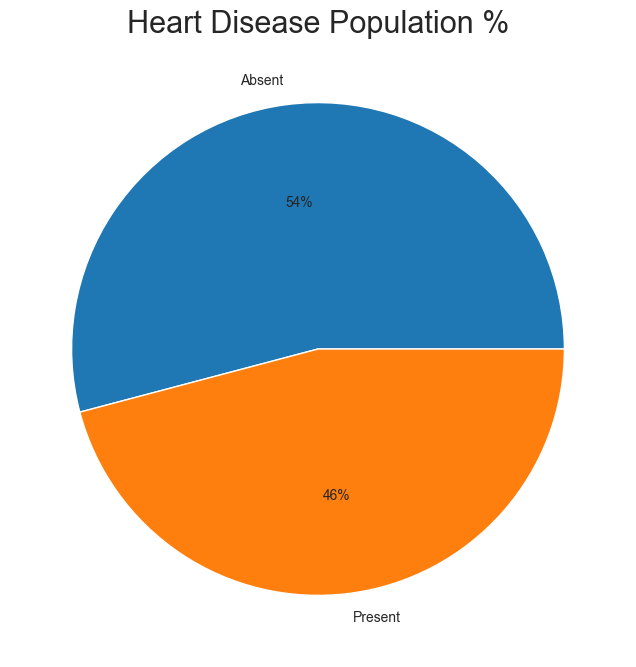

In [13]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(12,8))
plt.pie(heart, labels=['Absent','Present'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=22)
plt.show()

###### From the overall population, people having heart disease (46%) are lesser than those who have heart disease(56%)

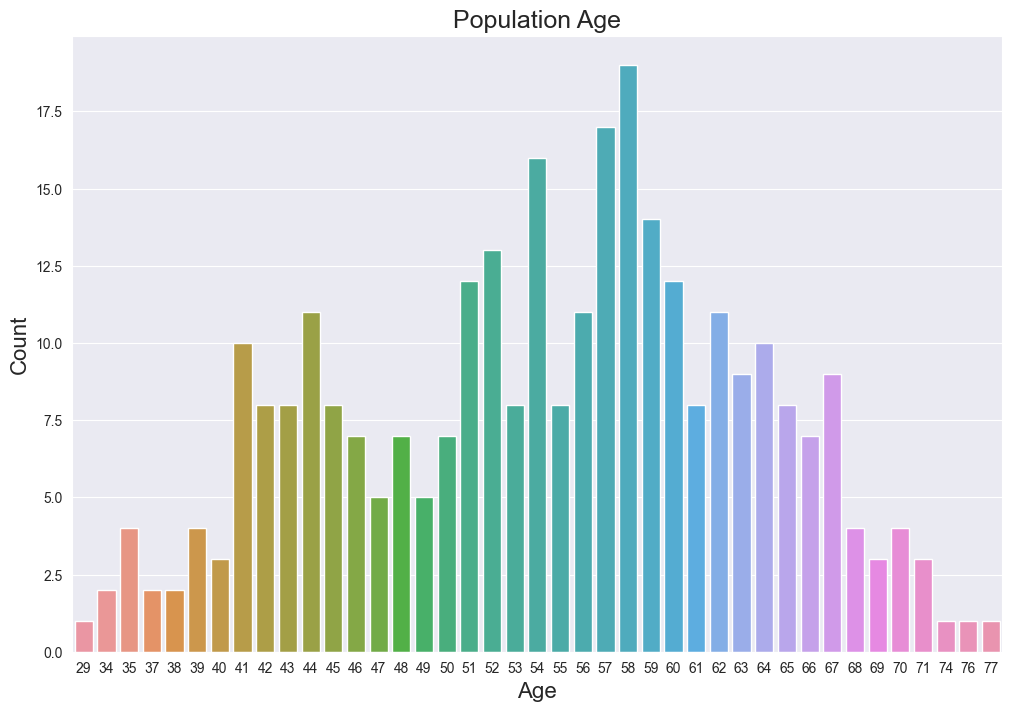

In [14]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(12,8))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

##### -> In this section, the best analysis could be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [15]:
#Performing stastical analysis for finding out the minimum,maximum and mean age

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [16]:
#Converting the outputs from stastical analysis into categoeical analysis

Young_Age=data[(data['age']>=29) & (data['age']<40)]
Middle_Age=data[(data['age']>=40) & (data['age']<55)]
Elderly_Age=data[(data['age']>55)]
print('Young Age =',len(Young_Age))
print('Middle Age =',len(Middle_Age))
print('Elderly Age =',len(Elderly_Age))

Young Age = 15
Middle Age = 128
Elderly Age = 152


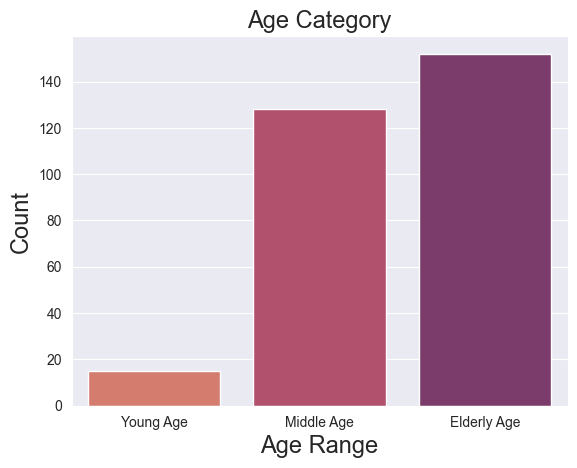

In [17]:
#Bar Plot Creation of Age Category 
sns.barplot(x=['Young Age','Middle Age','Elderly Age'], y=[len(Young_Age), len(Middle_Age), len(Elderly_Age)], palette='flare')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

In [18]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [19]:
#Applying converted data into our dataset with new column named-sex_1

data['sex_1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex_1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female


In [20]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex_1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Present,Male
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Present,Male
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Present,Male
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Present,Female
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0,Absent,Male


In [21]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<=55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [22]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex_1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,Middle Age


In [23]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex_1,Age_Range
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Present,Male,Middle Age
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Present,Male,Elder Age
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Present,Male,Elder Age
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Present,Female,Elder Age
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0,Absent,Male,Young Age


In [43]:
data.to_csv("Updated_heart_dataset.csv",index=False)

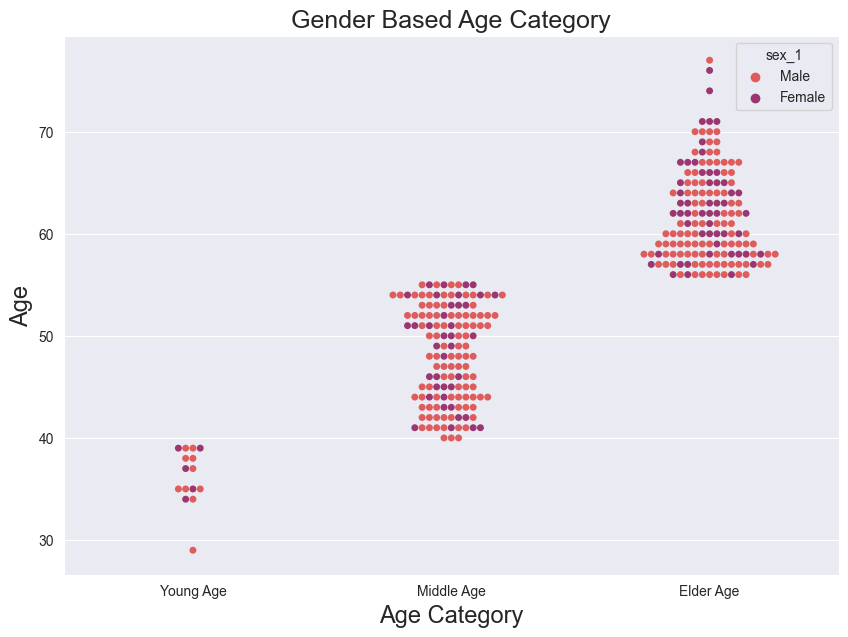

In [25]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex_1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='flare')
plt.title('Gender Based Age Category', fontsize=18)
plt.xlabel('Age Category', fontsize=17)
plt.ylabel('Age', fontsize=17)
plt.show()

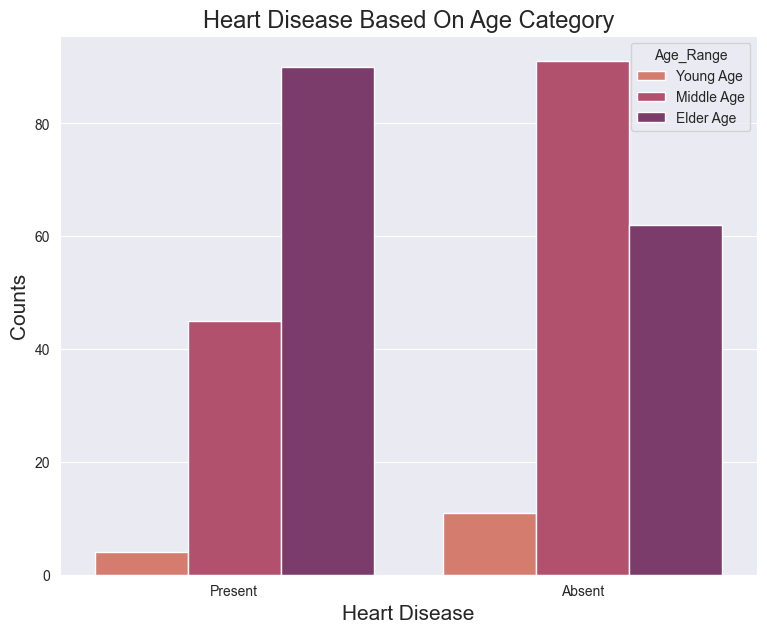

In [26]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(9,7))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Present','Absent'], hue_order=hue_order, palette='flare')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

#### ->Conclusion: Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease

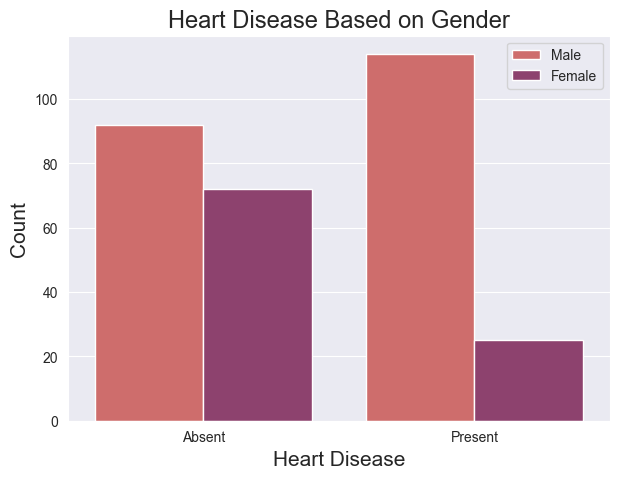

In [27]:
#Count Plot Creation of Heart Disease Based on Gender
plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex_1', data=data, palette='flare')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

#### ->Conclusion: On the basis of count plot, we can observe that Males are more prone to Heart Disease

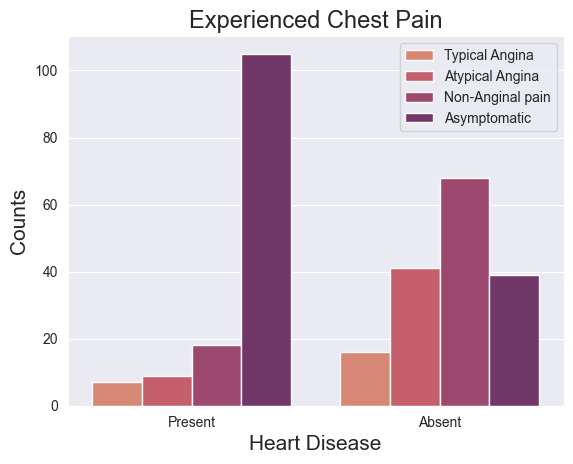

In [28]:
#Count Plot Creation of Experienced Chest Pain
sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Present','Absent'],palette='flare')
plt.title('Experienced Chest Pain', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### ->Conclusion: It is observed that, people having asymptomatic chest pain have a higher chance of heart disease.

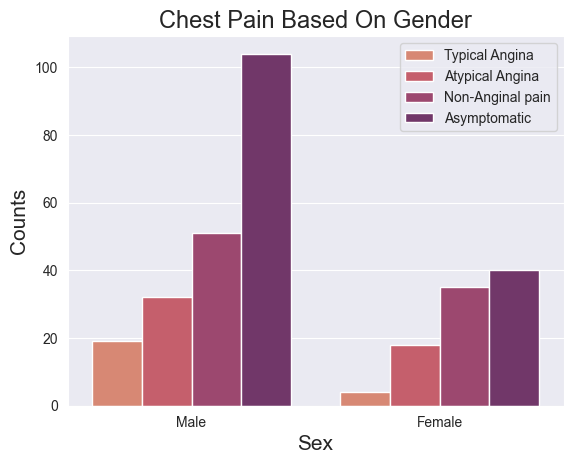

In [29]:
#Count Plot Creation of Chest Pain on the basis of gender

sns.countplot(x=data['sex_1'], hue='cp', data=data, palette=('flare'))
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

##### ->Conclusion:"It is observed that a higher number of men are suffering from Asymptomatic type of Chest Pain

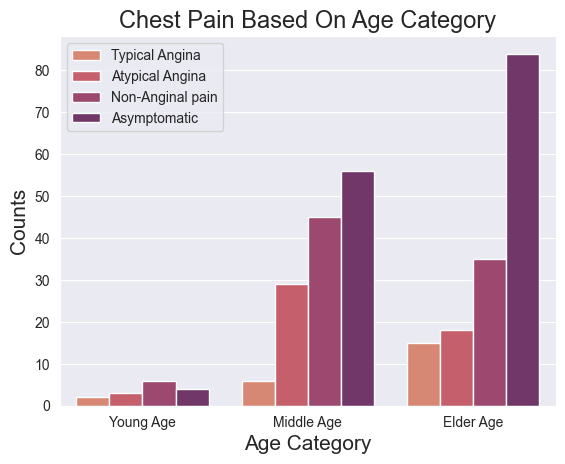

In [30]:
#Count Plot Creation of Chest Pain Based On Age Category

sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='flare')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### -> Conclusion: There is very high number of Asymptomatic Pain in Elderly age Category

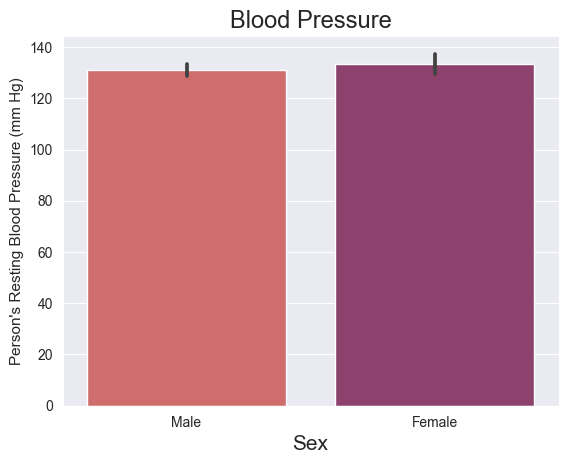

In [31]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex_1', y='trestbps', data=data, palette='flare')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=11)
plt.show()

#### -> Conclusion: It is observed that the blood Pressure Rate is almost equal in Males and Females

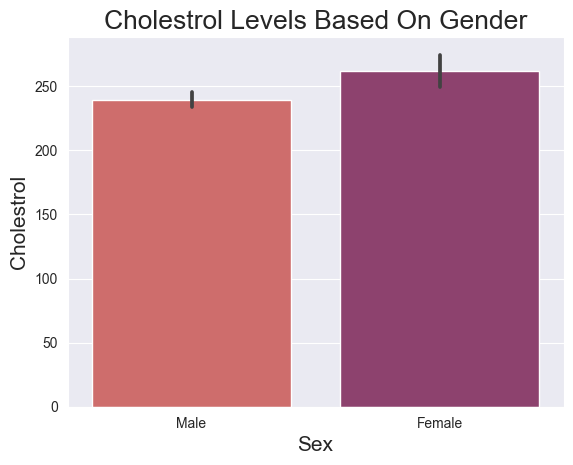

In [32]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex_1', y='chol', data=data, palette='flare')
plt.title("Cholestrol Levels Based On Gender", fontsize=19)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

#### -> Conclusion: females have little bit of higher cholesterol than males

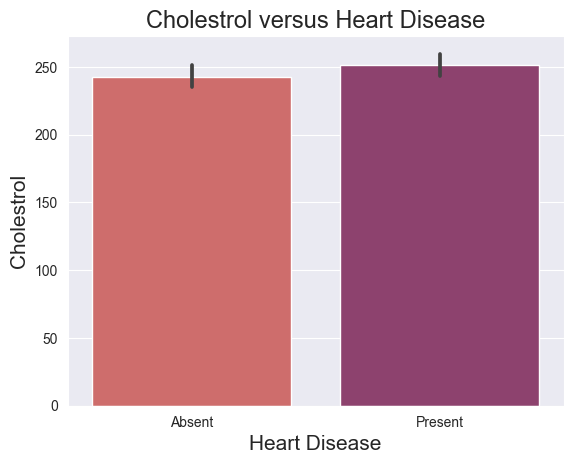

In [33]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='flare')
plt.title('Cholestrol versus Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

#### ->Conclusion: Higher Cholestrol Level results Chances Of Heart Disease

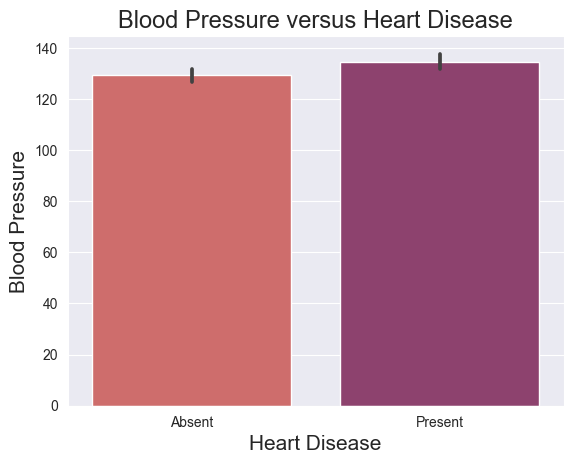

In [34]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='flare')
plt.title('Blood Pressure versus Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

### ->Conclusion: Higher Blood Pressure Level results Chances Of Heart Disease

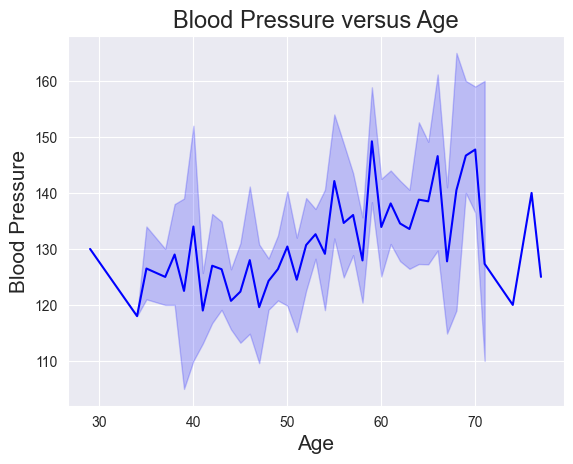

In [35]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='blue')
plt.title('Blood Pressure versus Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

#### ->Conclusion: Blood Pressure increases between age of 50 to 60 and continue the till 70

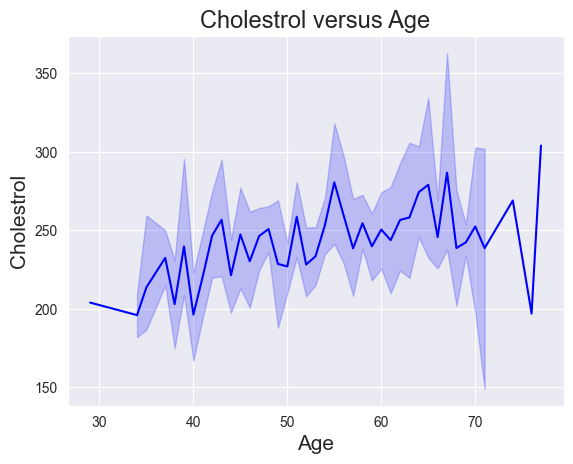

In [36]:
#Line Plot Creation of Cholestrol versus Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol versus Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

#### ->Conclusion: Similarly Cholestrol Increasing in the age group of 50-60

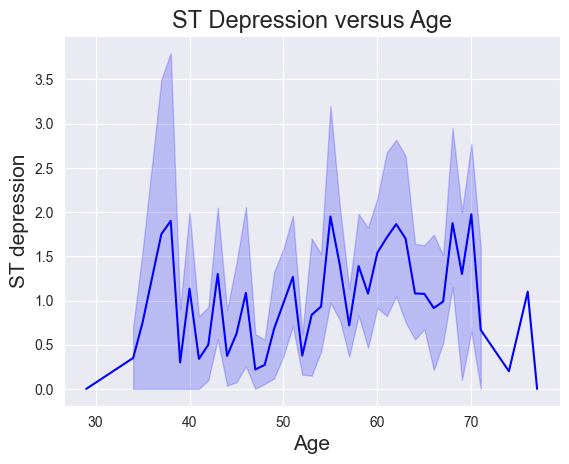

In [37]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='blue')
plt.title('ST Depression versus Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

#### -> Concluion:ST depression mostly increases bw the age group of 30-40

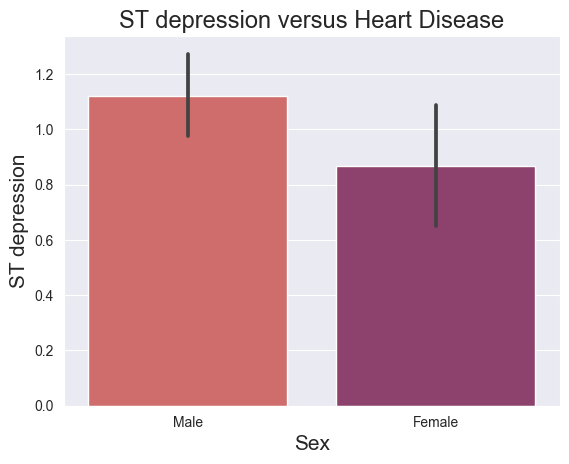

In [38]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex_1', y='oldpeak', data=data, palette='flare')
plt.title('ST depression versus Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

#### ->ConcluiMore Males are prone to ST depression as compare to females

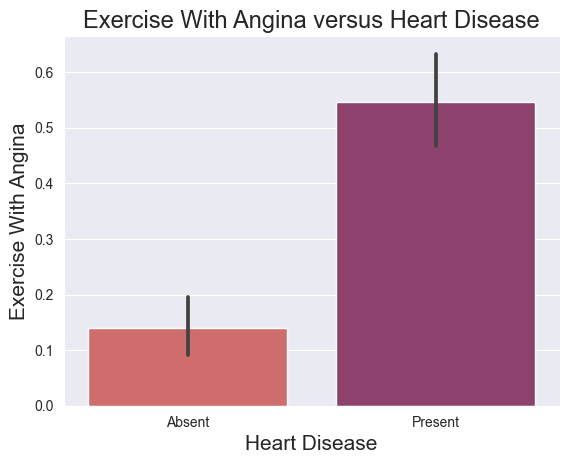

In [39]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='flare')
plt.title('Exercise With Angina versus Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

#### ->Conclusion: If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

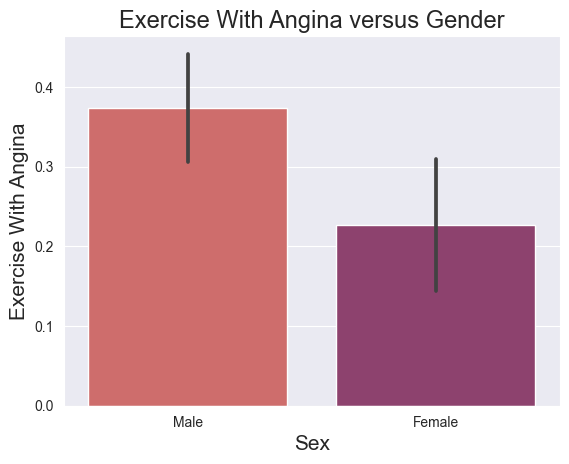

In [40]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex_1', y='exang', data=data, palette='flare')
plt.title('Exercise With Angina versus Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

#### ->Conclusion: Males have have high Exercise Angina

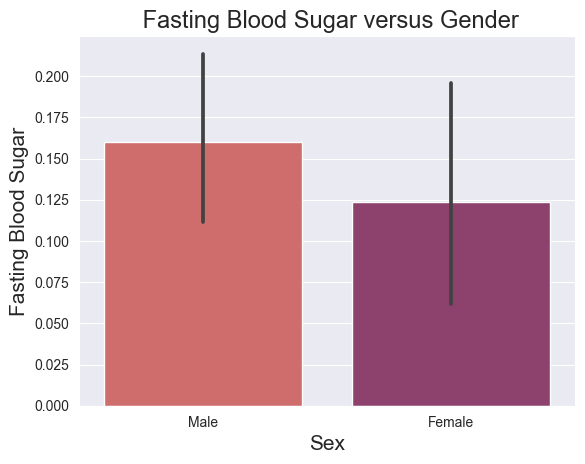

In [41]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex_1', data=data, palette='flare')
plt.title(' Fasting Blood Sugar versus Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

#### ->Conclusion:- Males have high no of Fasting Blood Sugar over 120

C:\Users\hp\AppData\Local\Temp\ipykernel_19920\1664350683.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidth=5)


<AxesSubplot: >

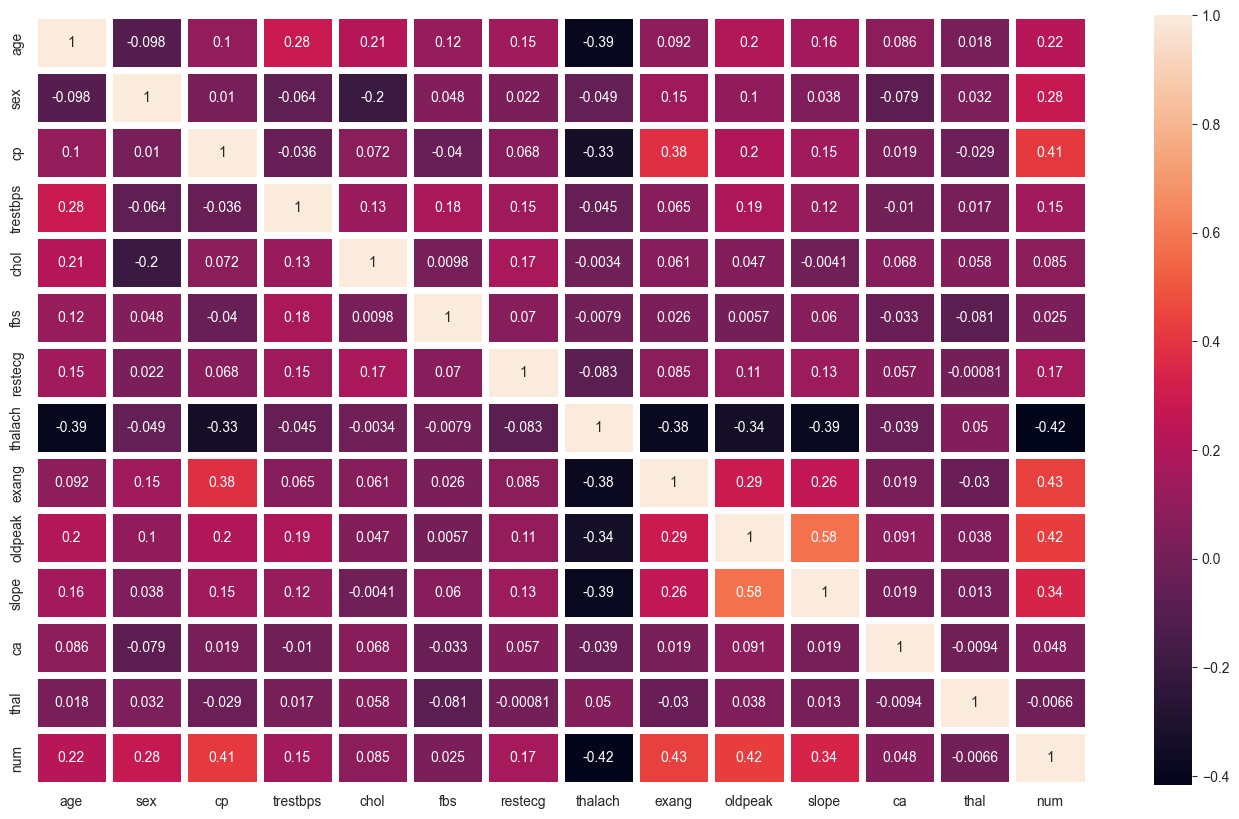

In [42]:
#Heatmap Creation

plt.figure(figsize=(17,10))
sns.heatmap(data.corr(), annot=True, linewidth=5)